<a href="https://colab.research.google.com/github/kamijoseph/Fake-News/blob/main/fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [80]:
fake = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [81]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [82]:
fake["subject"].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


<Axes: xlabel='subject', ylabel='count'>

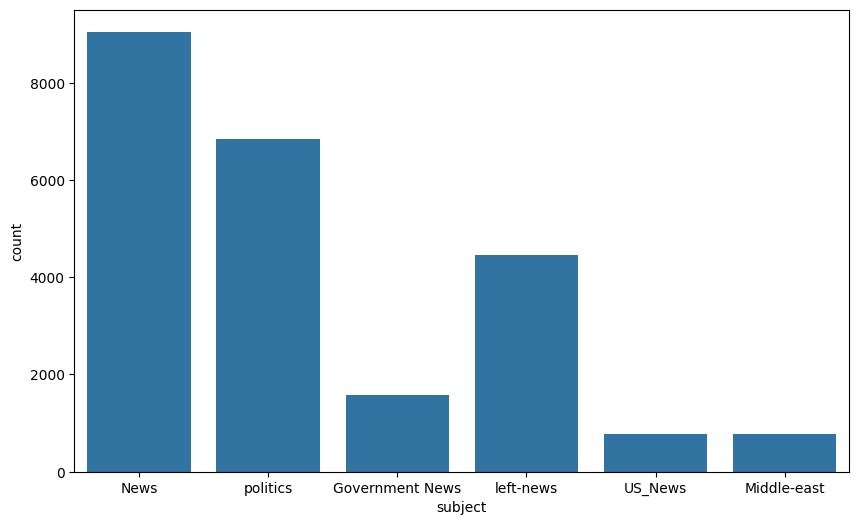

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(x="subject", data=fake)

In [84]:
# visualizing text with word cloud
text = " ".join(fake["text"].tolist())

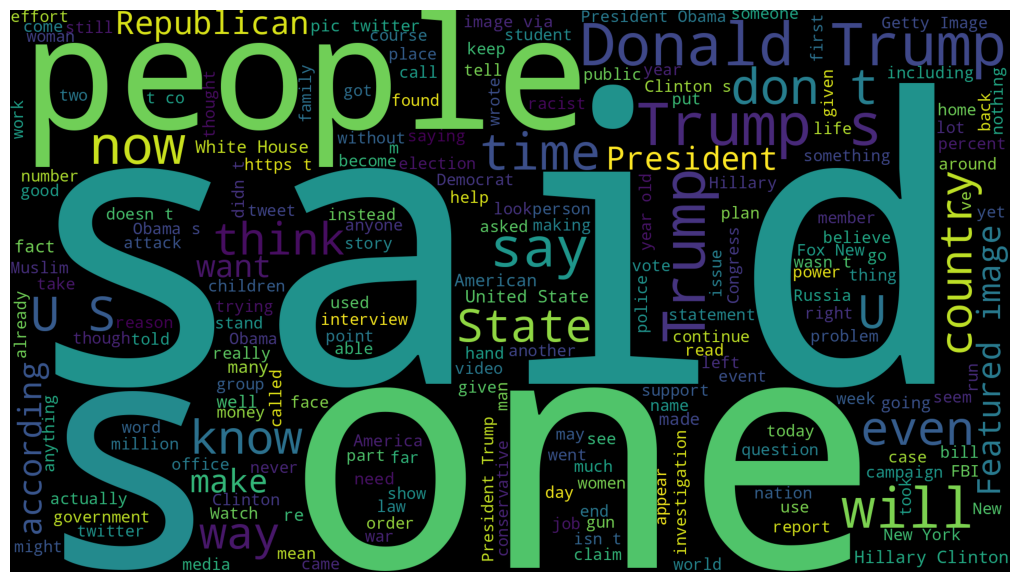

In [85]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [86]:
real = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv")
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [87]:
text_real = " ".join(real["text"].tolist())

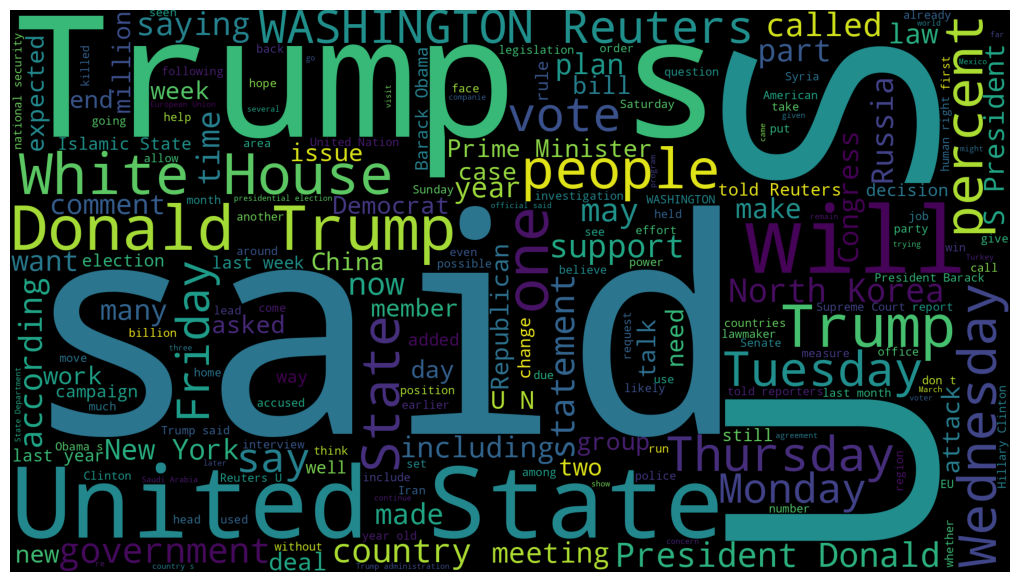

In [88]:
wordcloud = WordCloud(width=1920, height=1080).generate(text_real)
fig = plt.figure(figsize=(10, 20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Cleaning the data

In [89]:
real.sample(10)

,title,text,subject,date
8082,Clinton tells Wells Fargo customers CEO owes t...,WASHINGTON (Reuters) - Democratic presidential...,politicsNews,"September 20, 2016"
14805,Venezuela opposition says talks with governmen...,CARACAS (Reuters) - Venezuela s opposition sai...,worldnews,"November 14, 2017"
14164,SocGen says no wrongdoing in handling of Natio...,PARIS (Reuters) - French bank Societe Generale...,worldnews,"November 22, 2017"
15318,"Pentagon confirms rare, three aircraft carrier...",WASHINGTON (Reuters) - The Pentagon said on We...,worldnews,"November 9, 2017"
19808,Vietnam jails dissident for five years in crac...,HANOI (Reuters) - A court in Vietnam jailed di...,worldnews,"September 18, 2017"
12241,Peru's Kuczynski says will not resign over Ode...,LIMA (Reuters) - Peruvian President Pedro Pabl...,worldnews,"December 15, 2017"
5868,Merkel says U.S. travel ban not justified by t...,BERLIN (Reuters) - Chancellor Angela Merkel sa...,politicsNews,"January 30, 2017"
9470,Trump taps adviser Manafort to be campaign cha...,"WASHINGTON (Reuters) - Donald Trump, the presu...",politicsNews,"May 19, 2016"
4922,Conservative website only media on Tillerson p...,SEOUL (Reuters) - U.S. Secretary of State Rex ...,politicsNews,"March 15, 2017"
20237,Hardliners protest French labor reform after M...,PARIS (Reuters) - Tens of thousands of hard-le...,worldnews,"September 11, 2017"


In [90]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split("-", maxsplit=1)
    record[1]
    assert(len(record[0]) < 120)
  except:
    unknown_publishers.append(index)


In [91]:
len(unknown_publishers)

222

In [92]:
real.iloc[unknown_publishers].text

,text
7,The following statements were posted to the ve...
8,The following statements were posted to the ve...
12,The following statements were posted to the ve...
13,The following statements were posted to the ve...
14,"(In Dec. 25 story, in second paragraph, corre..."
...,...
20135,(Story corrects to million from billion in pa...
20500,"(This Sept 8 story corrects headline, clarifi..."
20667,"(Story refiles to add dropped word not , in ..."
21246,(Story corrects third paragraph to show Mosul...


In [93]:
real.iloc[8970]

,8970
title,Graphic: Supreme Court roundup
text,
subject,politicsNews
date,"June 16, 2016"


In [94]:
real = real.drop(8970, axis=0)

In [95]:
publisher = []
tmp_text = []
for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append("Unknown")
  else:
    record = row.split("-", maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [96]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [97]:
real["publisher"] = publisher
real["text"] = tmp_text

In [98]:
real.sample(10)

,title,text,subject,date,publisher
4207,U.S. senator raises questions about hospital o...,A Republican senator said on Tuesday he had wr...,politicsNews,"April 18, 2017",(Reuters)
12642,Trump's Jerusalem decision could help militant...,U.S President Donald Trump s decision to recog...,worldnews,"December 10, 2017",DUBAI (Reuters)
6003,White House says looks to reschedule meeting w...,The White House said on Thursday that it would...,politicsNews,"January 26, 2017",PHILADELPHIA (Reuters)
2804,Kremlin 'has nothing to do' with Russian lawye...,The Kremlin has never been in touch with Russi...,politicsNews,"July 12, 2017",MOSCOW (Reuters)
8631,Kerry says raised Democrat email hack with Rus...,U.S. Secretary of State John Kerry said on Tue...,politicsNews,"July 26, 2016",VIENTIANE (Reuters)
13448,"Venezuela confirms ex-oil bosses Del Pino, Mar...",Venezuela s state prosecutor confirmed on Thur...,worldnews,"November 30, 2017",CARACAS (Reuters)
10867,Former Senator Webb rules out independent pres...,"Former Virginia Senator Jim Webb, who dropped ...",politicsNews,"February 11, 2016",WASHINGTON (Reuters)
17071,Former soccer star Kaladze runs for mayor in G...,Kakha Kaladze climbed to the top of world socc...,worldnews,"October 19, 2017",TBILISI (Reuters)
5988,House lawmaker seeks more documents in FDA cri...,A top U.S. lawmaker accused the Food and Drug ...,politicsNews,"January 26, 2017",WASHINGTON (Reuters)
15850,South Africa considering best time for nuclear...,South African President Jacob Zuma said on Thu...,worldnews,"November 2, 2017",CAPE TOWN (Reuters)


In [99]:
real.shape

(21416, 5)

In [100]:
fake.shape

(23481, 4)

In [101]:
empty_fake_index = [index for index, text in enumerate(fake.text.to_list()) if str(text).strip()==""]
len(empty_fake_index)

630

In [102]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [103]:
real["text"] = real["title"] + " " + real["text"]
fake["text"] = fake["title"] + " " + fake["text"]

In [104]:
real.sample(10)

,title,text,subject,date,publisher
18277,Thousands queue to pay last respects to Thaila...,Thousands queue to pay last respects to Thaila...,worldnews,"October 5, 2017",BANGKOK (Reuters)
19798,China Communist Party complains about 'fabrica...,China Communist Party complains about 'fabrica...,worldnews,"September 18, 2017",BEIJING (Reuters)
14194,Turkey orders detention of 216 people in post-...,Turkey orders detention of 216 people in post-...,worldnews,"November 22, 2017",ANKARA (Reuters)
2111,"Once credited with Trump's success, Bannon qui...","Once credited with Trump's success, Bannon qui...",politicsNews,"August 18, 2017",WASHINGTON (Reuters)
17668,"Trump praises release of U.S.-Canadian family,...","Trump praises release of U.S.-Canadian family,...",worldnews,"October 12, 2017",WASHINGTON (Reuters)
8586,U.S. Air Force asks industry for proposals to ...,U.S. Air Force asks industry for proposals to ...,politicsNews,"July 29, 2016",WASHINGTON (Reuters)
4635,Egyptian president to meet Trump at White Hous...,Egyptian president to meet Trump at White Hous...,politicsNews,"March 28, 2017",WASHINGTON (Reuters)
16627,Ukraine cyber police chief says Ukraine hit by...,Ukraine cyber police chief says Ukraine hit by...,worldnews,"October 24, 2017",KIEV (Reuters)
13841,Cambodia's Hun Sen calls for closure of rights...,Cambodia's Hun Sen calls for closure of rights...,worldnews,"November 26, 2017",PHNOM PENH (Reuters)
15124,"France wants Hariri movements' free, able to p...","France wants Hariri movements' free, able to p...",worldnews,"November 10, 2017",PARIS (Reuters)


In [105]:
real["text"] = real["text"].apply(lambda x: str(x).lower())
fake["text"] = fake["text"].apply(lambda x: str(x).lower())

In [106]:
real.sample(10)

,title,text,subject,date,publisher
18651,Police to remove people from Catalan voting st...,police to remove people from catalan voting st...,worldnews,"September 30, 2017",BARCELONA (Reuters)
15206,Tillerson speaks to Saudi counterpart about ar...,tillerson speaks to saudi counterpart about ar...,worldnews,"November 9, 2017",WASHINGTON (Reuters)
17205,"Catalonia refuses to renounce independence, se...","catalonia refuses to renounce independence, se...",worldnews,"October 17, 2017",BARCELONA (Reuters)
3985,Trump won't trade U.S. jobs for China's help o...,trump won't trade u.s. jobs for china's help o...,politicsNews,"May 1, 2017",WASHINGTON (Reuters)
5068,Trump to meet with business leaders on infrast...,trump to meet with business leaders on infrast...,politicsNews,"March 8, 2017",WASHINGTON (Reuters)
7495,Trump on accepting election results: 'see how ...,trump on accepting election results: 'see how ...,politicsNews,"November 8, 2016",WASHINGTON (Reuters)
18776,Nigeria to hold presidential and parliamentary...,nigeria to hold presidential and parliamentary...,worldnews,"September 28, 2017",ABUJA (Reuters)
21359,Turkey will never be EU member under Erdogan: ...,turkey will never be eu member under erdogan: ...,worldnews,"August 24, 2017",BERLIN (Reuters)
2113,Trump fires adviser Bannon,trump fires adviser bannon president donald tr...,politicsNews,"August 18, 2017","WASHINGTON/HAGERSTOWN, Md. (Reuters)"
3961,Trump nominee for ambassador to Beijing says C...,trump nominee for ambassador to beijing says c...,politicsNews,"May 2, 2017",WASHINGTON (Reuters)


In [107]:
fake.sample(10)

,title,text,subject,date
6734,Maine GOP Governor’s Statement On Drug Overdo...,maine gop governor’s statement on drug overdo...,News,"April 24, 2016"
16684,FINALLY! FBI Uses Mystery Method To Unlock Ter...,finally! fbi uses mystery method to unlock ter...,Government News,"Mar 28, 2016"
12370,SHOCKER! IS MITT ROMNEY Being Considered For A...,shocker! is mitt romney being considered for a...,politics,"Nov 17, 2016"
16635,UNREAL! HERE’S WHY ICE RELEASED BUT DIDN’T DEP...,unreal! here’s why ice released but didn’t dep...,Government News,"Apr 28, 2016"
15471,THIS BIG ANNOUNCEMENT IS YET ANOTHER REASON NO...,this big announcement is yet another reason no...,politics,"Jul 12, 2015"
22178,Boiler Room #100 – An Unlikely Alchemy,boiler room #100 – an unlikely alchemy tune in...,US_News,"March 9, 2017"
13231,PA TRUMP RALLY: How Support From The Amish Com...,pa trump rally: how support from the amish com...,politics,"Aug 16, 2016"
17851,ANGRY LIBERAL STORE OWNER Gets Slammed For Usi...,angry liberal store owner gets slammed for usi...,left-news,"Oct 7, 2017"
20519,REGISTERED SEX OFFENDER Arrested After “Harass...,registered sex offender arrested after “harass...,left-news,"May 26, 2016"
1876,Here’s The Veiled Threat Trump Sent CNN Chief...,here’s the veiled threat trump sent cnn chief...,News,"April 6, 2017"


In [108]:
real.tail(10)

,title,text,subject,date,publisher
21407,"Mata Pires, owner of embattled Brazil builder ...","mata pires, owner of embattled brazil builder ...",worldnews,"August 22, 2017",SAO PAULO (Reuters)
21408,"U.S., North Korea clash at U.N. forum over nuc...","u.s., north korea clash at u.n. forum over nuc...",worldnews,"August 22, 2017",GENEVA (Reuters)
21409,"U.S., North Korea clash at U.N. arms forum on ...","u.s., north korea clash at u.n. arms forum on ...",worldnews,"August 22, 2017",GENEVA (Reuters)
21410,Headless torso could belong to submarine journ...,headless torso could belong to submarine journ...,worldnews,"August 22, 2017",COPENHAGEN (Reuters)
21411,North Korea shipments to Syria chemical arms a...,north korea shipments to syria chemical arms a...,worldnews,"August 21, 2017",UNITED NATIONS (Reuters)
21412,'Fully committed' NATO backs new U.S. approach...,'fully committed' nato backs new u.s. approach...,worldnews,"August 22, 2017",BRUSSELS (Reuters)
21413,LexisNexis withdrew two products from Chinese ...,lexisnexis withdrew two products from chinese ...,worldnews,"August 22, 2017",LONDON (Reuters)
21414,Minsk cultural hub becomes haven from authorities,minsk cultural hub becomes haven from authorit...,worldnews,"August 22, 2017",MINSK (Reuters)
21415,Vatican upbeat on possibility of Pope Francis ...,vatican upbeat on possibility of pope francis ...,worldnews,"August 22, 2017",MOSCOW (Reuters)
21416,Indonesia to buy $1.14 billion worth of Russia...,indonesia to buy $1.14 billion worth of russia...,worldnews,"August 22, 2017",JAKARTA (Reuters)


In [109]:
fake.sample(10)

,title,text,subject,date
11696,LOL! OBAMA’S RADICAL EPA CHIEF Says There Was ...,lol! obama’s radical epa chief says there was ...,politics,"Feb 9, 2017"
20135,CLAREMONT COLLEGES “Students Of Color” REFUSE ...,claremont colleges “students of color” refuse ...,left-news,"Aug 12, 2016"
23461,REPORT: ‘Federal Government Escalated the Viol...,report: ‘federal government escalated the viol...,Middle-east,"January 28, 2016"
6773,Patton Oswalt To Bernie Fans: ‘You’re A F*cki...,patton oswalt to bernie fans: ‘you’re a f*cki...,News,"April 21, 2016"
3608,Dems SLAM Trump For Racist Support And Kellya...,dems slam trump for racist support and kellya...,News,"December 1, 2016"
22584,BOILER ROOM – EP #54 – America… The End is Nigh,boiler room – ep #54 – america… the end is nig...,US_News,"April 28, 2016"
9807,AMERICA’S OLDEST Suit Manufacturer Drops NFL A...,america’s oldest suit manufacturer drops nfl a...,politics,"Sep 27, 2017"
253,Trump Kicks Off Hispanic Heritage Month By Sa...,trump kicks off hispanic heritage month by sa...,News,"October 6, 2017"
18705,TUCKER TRIES TO REASON With A Crazy Feminist I...,tucker tries to reason with a crazy feminist i...,left-news,"May 2, 2017"
12561,MULTIPLE FBI OFFICES Investigated Clinton Foun...,multiple fbi offices investigated clinton foun...,politics,"Oct 30, 2016"


In [110]:
# labels
real["class"] = 1
fake["class"] = 0
print(real.columns, fake.columns)

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object') Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')
